# 🔁 **Day 18: SQL Recap for API + Analysis Use**

**Goal:** Revisit SQL in a way that strengthens your API data analysis and prepares you for projects like dashboards, filtering, and BigQuery usage.

---

## SQL You *Actually* Need in Real Life

| Concept | SQL Syntax | API/Pandas Equivalent |
| --- | --- | --- |
| Select Columns | `SELECT name, age` | `df[['name', 'age']]` |
| Filter Rows | `WHERE age > 25` | `df[df['age'] > 25]` |
| Sort | `ORDER BY age DESC` | `df.sort_values(by='age', ascending=False)` |
| Limit Results | `LIMIT 10` | `df.head(10)` |
| Aggregate | `COUNT()`, `AVG()` | `df['col'].count()`, `mean()`, etc. |
| Group & Count | `GROUP BY category` | `df.groupby('category').count()` |
| Rename | `AS` | `df.rename(columns={'old': 'new'})` |

---

## 🔍 Real-World API Use Case

### 📰 You hit a News API and get 100 articles.

How do you:

- Filter for `"India"` + `"Politics"`?
- Sort by `publishedAt`?
- Count how many are from `"NDTV"`?

✅ You apply SQL logic — via:

- Query parameters in API: `?q=india&category=politics`
- Pandas filtering after fetching: `df[df['source'] == 'NDTV']`

---

## 🛠️ Hands-On Exercise

Use this fake API data structure (simulate it as a `DataFrame`):

In [1]:
import pandas as pd

data = [
    {"title": "India election updates", "source": "NDTV", "category": "Politics", "published": "2025-08-01"},
    {"title": "New AI model launched", "source": "TechCrunch", "category": "Technology", "published": "2025-08-03"},
    {"title": "Sports highlights", "source": "ESPN", "category": "Sports", "published": "2025-08-02"},
    {"title": "Parliament session highlights", "source": "NDTV", "category": "Politics", "published": "2025-08-01"},
]

df = pd.DataFrame(data)


### 🔧 Task:

1. Show only articles from **NDTV**
2. Count how many are in the **Politics** category
3. Show top 2 most recent articles (`published` descending)
4. Add a new column `tagline` = `"CATEGORY - TITLE"`

In [2]:
df.head()

,title,source,category,published
0,India election updates,NDTV,Politics,2025-08-01
1,New AI model launched,TechCrunch,Technology,2025-08-03
2,Sports highlights,ESPN,Sports,2025-08-02
3,Parliament session highlights,NDTV,Politics,2025-08-01


In [ ]:
# 1.
df[df['source']=='NDTV']
df[['title','category']][df['source']=='NDTV'] # especially useful for focused views


query1 = '''
        SELECT title 
        FROM df
        WHERE source = 'NDTV';
'''

In [ ]:
# 2.
df['category'][df['category']=='Politics'].value_counts()
df[df['category']=='Politics'].shape[0]

query2 = '''
        SELECT count(category) AS count
        FROM df
        WHERE category = 'Politics';
'''

In [42]:
# 3.
df.sort_values(by='published', ascending=False).head(2)

query3 = '''
        SELECT *
        FROM df
        ORDER BY published DESC
        LIMIT 2;
'''

In [45]:
# 4.
df['tagline'] = df['category'] + " - " + df['title']
df

query4 = '''
        SELECT *,
        CONCAT(category, ' - ', title) AS tagline
        FROM df;
'''

<Axes: ylabel='count'>

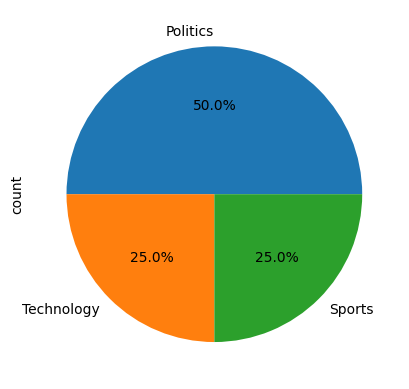

In [47]:
df['category'].value_counts().plot.pie(autopct="%1.1f%%")